# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Set up API URL

url = "http://api.openweathermap.org/data/2.5/weather?appid="
dataCity = []
dataLat = []
dataLng = []
dataMaxTemp = []
dataHumidity = []
dataCloudiness = []
dataWindSpeed = []
dataCountry = []
dataDate = []
cityNumber = 0

#Run a loop

for wCity in cities:
    query_url = url + weather_api_key + "&units=imperial&q=" + wCity
    cityNumber+=1
    print(f"Querying city number {cityNumber}, {wCity}...")
    weather_response = requests.get(query_url)
    cityData = weather_response.json()
    try:
        dataCity.append(cityData["name"])
        dataLat.append(cityData["coord"]["lat"])
        dataLng.append(cityData["coord"]["lon"])
        dataMaxTemp.append(cityData["main"]["temp_max"])
        dataHumidity.append(cityData["main"]["humidity"])
        dataCloudiness.append(cityData["clouds"]["all"])
        dataWindSpeed.append(cityData["wind"]["speed"])
        dataCountry.append(cityData["sys"]["country"])
        dataDate.append(cityData["dt"])
    except:
        print("Oops! Data not found. Skipping...")
    time.sleep(1)
    print("Done.")


Querying city number 1, busselton...
Done.
Querying city number 2, hilo...
Done.
Querying city number 3, rikitea...
Done.
Querying city number 4, salekhard...
Done.
Querying city number 5, tasiilaq...
Done.
Querying city number 6, upernavik...
Done.
Querying city number 7, sobolevo...
Done.
Querying city number 8, vaini...
Done.
Querying city number 9, attawapiskat...
Oops! Data not found. Skipping...
Done.
Querying city number 10, kutum...
Done.
Querying city number 11, hobart...
Done.
Querying city number 12, medicine hat...
Done.
Querying city number 13, nikolskoye...
Done.
Querying city number 14, tumannyy...
Oops! Data not found. Skipping...
Done.
Querying city number 15, yueyang...
Done.
Querying city number 16, castro...
Done.
Querying city number 17, los llanos de aridane...
Done.
Querying city number 18, ca mau...
Done.
Querying city number 19, ancud...
Done.
Querying city number 20, kaitangata...
Done.
Querying city number 21, hermanus...
Done.
Querying city number 22, jumla.

Done.
Querying city number 177, rio gallegos...
Done.
Querying city number 178, tual...
Done.
Querying city number 179, tuatapere...
Done.
Querying city number 180, grand river south east...
Oops! Data not found. Skipping...
Done.
Querying city number 181, carutapera...
Done.
Querying city number 182, beaverlodge...
Done.
Querying city number 183, vrangel...
Done.
Querying city number 184, dikson...
Done.
Querying city number 185, muriwai beach...
Done.
Querying city number 186, oksfjord...
Done.
Querying city number 187, trairi...
Done.
Querying city number 188, setermoen...
Done.
Querying city number 189, azare...
Done.
Querying city number 190, dharchula...
Done.
Querying city number 191, la gomera...
Done.
Querying city number 192, tigil...
Done.
Querying city number 193, maryborough...
Done.
Querying city number 194, ilulissat...
Done.
Querying city number 195, avera...
Done.
Querying city number 196, nouadhibou...
Done.
Querying city number 197, cidreira...
Done.
Querying city nu

Done.
Querying city number 346, cap-haitien...
Done.
Querying city number 347, fengrun...
Done.
Querying city number 348, westport...
Done.
Querying city number 349, puerto baquerizo moreno...
Done.
Querying city number 350, afmadu...
Oops! Data not found. Skipping...
Done.
Querying city number 351, lagos...
Done.
Querying city number 352, kieta...
Done.
Querying city number 353, langham...
Done.
Querying city number 354, filadelfia...
Done.
Querying city number 355, mareeba...
Done.
Querying city number 356, makakilo city...
Done.
Querying city number 357, gao...
Done.
Querying city number 358, tazovskiy...
Done.
Querying city number 359, kloulklubed...
Done.
Querying city number 360, barrow...
Done.
Querying city number 361, iberia...
Done.
Querying city number 362, artyom...
Done.
Querying city number 363, sur...
Done.
Querying city number 364, tabou...
Done.
Querying city number 365, hami...
Done.
Querying city number 366, tiznit...
Done.
Querying city number 367, klaksvik...
Done.

Done.
Querying city number 520, ixtapa...
Done.
Querying city number 521, saint-junien...
Done.
Querying city number 522, mount gambier...
Done.
Querying city number 523, alghero...
Done.
Querying city number 524, carahue...
Done.
Querying city number 525, barcelos...
Done.
Querying city number 526, peleduy...
Done.
Querying city number 527, nizhniy kuranakh...
Done.
Querying city number 528, burlington...
Done.
Querying city number 529, bassano...
Done.
Querying city number 530, najran...
Done.
Querying city number 531, dibulla...
Done.
Querying city number 532, yandyki...
Done.
Querying city number 533, zhigansk...
Done.
Querying city number 534, hun...
Done.
Querying city number 535, beroroha...
Done.
Querying city number 536, yar-sale...
Done.
Querying city number 537, port keats...
Done.
Querying city number 538, stornoway...
Done.
Querying city number 539, micheweni...
Done.
Querying city number 540, gua musang...
Done.
Querying city number 541, sioux lookout...
Done.
Querying ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cityWeather = pd.DataFrame({"City": dataCity,
                           "Lat": dataLat,
                           "Lng": dataLng,
                           "Max Temp": dataMaxTemp,
                           "Humidity": dataHumidity,
                           "Cloudiness": dataCloudiness,
                           "Wind Speed": dataWindSpeed,
                           "Country": dataCountry,
                           "Date": dataDate})

In [ ]:
cityWeather.to_csv("output_data/cities.csv")

In [15]:
city_data_df = pd.read_csv("output_data/cities.csv")

city_data_df = city_data_df.drop(columns = "Unnamed: 0")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.05,66,100,9.28,AU,1633658142
1,Hilo,19.7297,-155.0900,79.29,83,98,3.00,US,1633658260
2,Rikitea,-23.1203,-134.9692,73.85,74,34,9.31,PF,1633658261
3,Salekhard,66.5300,66.6019,45.10,81,100,23.13,RU,1633658262
4,Tasiilaq,65.6145,-37.6368,24.01,53,19,8.90,GL,1633658264
...,...,...,...,...,...,...,...,...,...
525,Roquetas de Mar,36.7642,-2.6148,69.80,80,0,0.45,ES,1633659030
526,Leh,34.1667,77.5833,46.81,26,0,2.95,IN,1633659031
527,Nordenham,53.5000,8.4833,47.01,98,28,4.76,DE,1633659033
528,Husavik,66.0449,-17.3389,42.84,96,100,10.31,IS,1633659016


In [16]:
summaryData = city_data_df.describe(include=[np.number])

summaryData


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,20.833431,19.686519,61.916491,72.615094,55.028302,7.413623,1.633659e+09
std,33.622976,88.837855,18.074948,19.312546,40.825197,5.699494,2.403788e+02
min,-54.800000,-175.200000,1.940000,1.000000,0.000000,0.000000,1.633658e+09
25%,-6.407950,-58.575900,47.625000,62.250000,9.250000,3.110000,1.633658e+09
50%,23.426000,21.875000,65.840000,77.000000,64.000000,5.970000,1.633659e+09
75%,50.368800,101.877500,77.100000,88.000000,99.000000,10.360000,1.633659e+09
max,78.218600,178.416700,96.570000,100.000000,100.000000,33.380000,1.633659e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.

humidCities = city_data_df.index[city_data_df["Humidity"] > 100]

humidCities


Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_df.drop(index = humidCities, inplace=False)

clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,61.05,66,100,9.28,AU,1633658142
1,Hilo,19.7297,-155.0900,79.29,83,98,3.00,US,1633658260
2,Rikitea,-23.1203,-134.9692,73.85,74,34,9.31,PF,1633658261
3,Salekhard,66.5300,66.6019,45.10,81,100,23.13,RU,1633658262
4,Tasiilaq,65.6145,-37.6368,24.01,53,19,8.90,GL,1633658264
...,...,...,...,...,...,...,...,...,...
525,Roquetas de Mar,36.7642,-2.6148,69.80,80,0,0.45,ES,1633659030
526,Leh,34.1667,77.5833,46.81,26,0,2.95,IN,1633659031
527,Nordenham,53.5000,8.4833,47.01,98,28,4.76,DE,1633659033
528,Husavik,66.0449,-17.3389,42.84,96,100,10.31,IS,1633659016


In [19]:
cleanSummaryData = clean_city_data.describe(include=[np.number])

cleanSummaryData


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,20.833431,19.686519,61.916491,72.615094,55.028302,7.413623,1.633659e+09
std,33.622976,88.837855,18.074948,19.312546,40.825197,5.699494,2.403788e+02
min,-54.800000,-175.200000,1.940000,1.000000,0.000000,0.000000,1.633658e+09
25%,-6.407950,-58.575900,47.625000,62.250000,9.250000,3.110000,1.633658e+09
50%,23.426000,21.875000,65.840000,77.000000,64.000000,5.970000,1.633659e+09
75%,50.368800,101.877500,77.100000,88.000000,99.000000,10.360000,1.633659e+09
max,78.218600,178.416700,96.570000,100.000000,100.000000,33.380000,1.633659e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

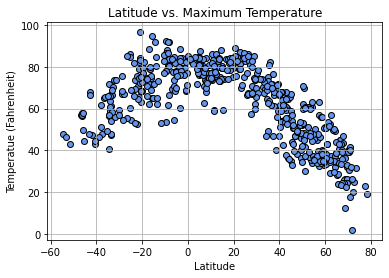

In [31]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperatue (Fahrenheit)")
plt.grid()

## Latitude vs. Humidity Plot

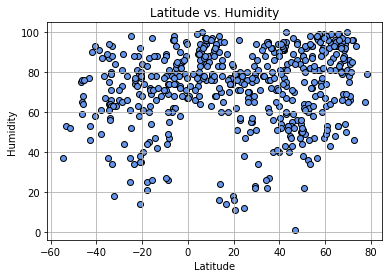

In [33]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

## Latitude vs. Cloudiness Plot

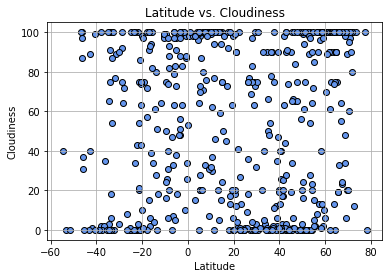

In [34]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

## Latitude vs. Wind Speed Plot

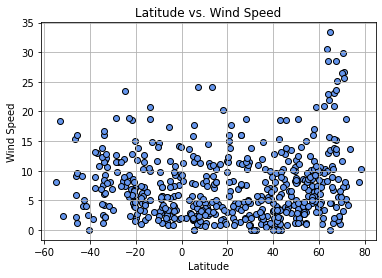

In [35]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="cornflowerblue", edgecolors="black")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


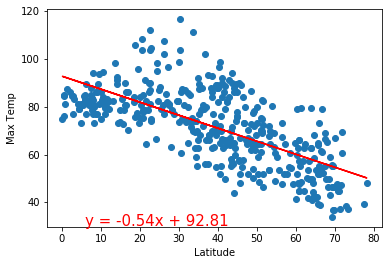

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


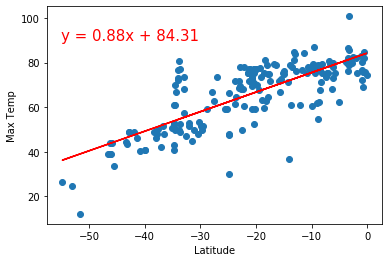

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


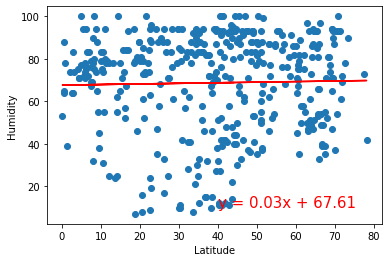

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


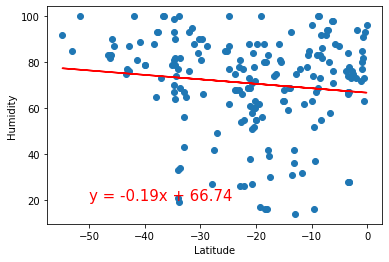

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


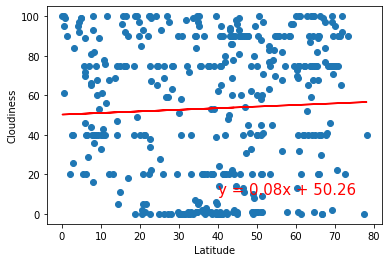

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


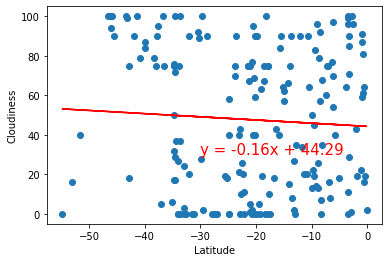

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


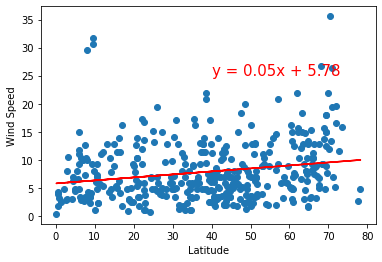

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


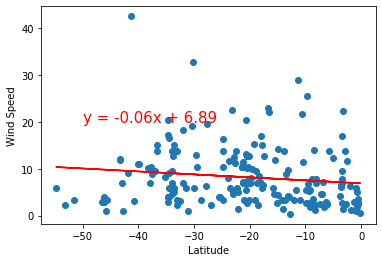